In [72]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import os
import cv2
from matplotlib import pyplot as plt

In [3]:
data_json = '../dataset/train.json'
data_json

'../dataset/train.json'

In [158]:
with open(data_json, 'r') as outfile:
    data = (json.load(outfile))

df_image = pd.DataFrame(data['images']) #이미지 데이터
df_annotation = pd.DataFrame(data['annotations']) #bbox 
df_categories = pd.DataFrame(data['categories'])#categories

In [5]:
df_image.head(5)

width  height       file_name  license flickr_url coco_url  \
0   1024    1024  train/0000.jpg        0       None     None   
1   1024    1024  train/0001.jpg        0       None     None   
2   1024    1024  train/0002.jpg        0       None     None   
3   1024    1024  train/0003.jpg        0       None     None   
4   1024    1024  train/0004.jpg        0       None     None   

         date_captured  id  
0  2020-12-26 14:44:23   0  
1  2021-01-10 16:30:39   1  
2  2020-12-27 17:55:52   2  
3  2021-03-31 12:10:36   3  
4  2021-01-01 18:52:38   4

In [6]:
df_annotation.head(5)

image_id  category_id       area                          bbox  iscrowd  id
0         0            0  257301.66  [197.6, 193.7, 547.8, 469.7]        0   0
1         1            3   10402.56     [0.0, 407.4, 57.6, 180.6]        0   1
2         1            7   26259.36    [0.0, 455.6, 144.6, 181.6]        0   2
3         1            4   69096.17  [722.3, 313.4, 274.3, 251.9]        0   3
4         1            5   24164.58  [353.2, 671.0, 233.7, 103.4]        0   4

In [7]:
df_categories.head(5)

id           name  supercategory
0   0  General trash  General trash
1   1          Paper          Paper
2   2     Paper pack     Paper pack
3   3          Metal          Metal
4   4          Glass          Glass

In [8]:
print('Shape of df_image: ', df_image.shape)
print('Shape of df_annotation: ', df_annotation.shape)
print('Shape of df_categories: ', df_categories.shape)

Shape of df_image:  (4883, 8)
Shape of df_annotation:  (23144, 6)
Shape of df_categories:  (10, 3)


## 데이터 통합

    image, annotation, category 통합

        1. df_image의 id column을 image_id로 변경
        2. df_image와 df_annotation을 image_id를 통해 merege
        3. df_categories의 id를 category_id로 변경
        4. 그리고 merge

In [9]:
#df_image column 명 변경
df_image = df_image.rename(columns={'id':'image_id'})
df_image.columns

Index(['width', 'height', 'file_name', 'license', 'flickr_url', 'coco_url',
       'date_captured', 'image_id'],
      dtype='object')

In [9]:
df = df_image.merge(df_annotation, how='left', on='image_id')
df

width  height       file_name  license flickr_url coco_url  \
0       1024    1024  train/0000.jpg        0       None     None   
1       1024    1024  train/0001.jpg        0       None     None   
2       1024    1024  train/0001.jpg        0       None     None   
3       1024    1024  train/0001.jpg        0       None     None   
4       1024    1024  train/0001.jpg        0       None     None   
...      ...     ...             ...      ...        ...      ...   
23139   1024    1024  train/4882.jpg        0       None     None   
23140   1024    1024  train/4882.jpg        0       None     None   
23141   1024    1024  train/4882.jpg        0       None     None   
23142   1024    1024  train/4882.jpg        0       None     None   
23143   1024    1024  train/4882.jpg        0       None     None   

             date_captured  image_id  category_id       area  \
0      2020-12-26 14:44:23         0            0  257301.66   
1      2021-01-10 16:30:39         1            3   10402.56   
2      2021-01-10 16:30:39         1            7   26259.36   
3      2021-01-10 16:30:39         1            4   69096.17   
4      2021-01-10 16:30:39         1            5   24164.58   
...                    ...       ...          ...        ...   
23139  2020-12-23 16:20:30      4882            5  768591.81   
23140  2020-12-23 16:20:30      4882            7   57309.72   
23141  2020-12-23 16:20:30      4882            0    1772.74   
23142  2020-12-23 16:20:30      4882            1   53008.67   
23143  2020-12-23 16:20:30      4882            1  149633.22   

                               bbox  iscrowd     id  
0      [197.6, 193.7, 547.8, 469.7]        0      0  
1         [0.0, 407.4, 57.6, 180.6]        0      1  
2        [0.0, 455.6, 144.6, 181.6]        0      2  
3      [722.3, 313.4, 274.3, 251.9]        0      3  
4      [353.2, 671.0, 233.7, 103.4]        0      4  
...                             ...      ...    ...  
23139    [0.0, 116.2, 944.1, 814.1]        0  23139  
23140  [302.1, 439.3, 265.2, 216.1]        0  23140  
23141    [511.3, 451.1, 58.7, 30.2]        0  23141  
23142  [255.0, 421.4, 271.7, 195.1]        0  23142  
23143  [145.4, 295.4, 420.2, 356.1]        0  23143  

[23144 rows x 13 columns]

In [10]:
df.shape

(23144, 13)

In [11]:
#df_categories column명 변경
df_categories = df_categories.rename(columns={'id':'category_id'})
df_categories.columns

Index(['category_id', 'name', 'supercategory'], dtype='object')

In [12]:
df = df.merge(df_categories, how='left', on='category_id')
df

width  height       file_name  license flickr_url coco_url  \
0       1024    1024  train/0000.jpg        0       None     None   
1       1024    1024  train/0001.jpg        0       None     None   
2       1024    1024  train/0001.jpg        0       None     None   
3       1024    1024  train/0001.jpg        0       None     None   
4       1024    1024  train/0001.jpg        0       None     None   
...      ...     ...             ...      ...        ...      ...   
23139   1024    1024  train/4882.jpg        0       None     None   
23140   1024    1024  train/4882.jpg        0       None     None   
23141   1024    1024  train/4882.jpg        0       None     None   
23142   1024    1024  train/4882.jpg        0       None     None   
23143   1024    1024  train/4882.jpg        0       None     None   

             date_captured  image_id  category_id       area  \
0      2020-12-26 14:44:23         0            0  257301.66   
1      2021-01-10 16:30:39         1            3   10402.56   
2      2021-01-10 16:30:39         1            7   26259.36   
3      2021-01-10 16:30:39         1            4   69096.17   
4      2021-01-10 16:30:39         1            5   24164.58   
...                    ...       ...          ...        ...   
23139  2020-12-23 16:20:30      4882            5  768591.81   
23140  2020-12-23 16:20:30      4882            7   57309.72   
23141  2020-12-23 16:20:30      4882            0    1772.74   
23142  2020-12-23 16:20:30      4882            1   53008.67   
23143  2020-12-23 16:20:30      4882            1  149633.22   

                               bbox  iscrowd     id           name  \
0      [197.6, 193.7, 547.8, 469.7]        0      0  General trash   
1         [0.0, 407.4, 57.6, 180.6]        0      1          Metal   
2        [0.0, 455.6, 144.6, 181.6]        0      2    Plastic bag   
3      [722.3, 313.4, 274.3, 251.9]        0      3          Glass   
4      [353.2, 671.0, 233.7, 103.4]        0      4        Plastic   
...                             ...      ...    ...            ...   
23139    [0.0, 116.2, 944.1, 814.1]        0  23139        Plastic   
23140  [302.1, 439.3, 265.2, 216.1]        0  23140    Plastic bag   
23141    [511.3, 451.1, 58.7, 30.2]        0  23141  General trash   
23142  [255.0, 421.4, 271.7, 195.1]        0  23142          Paper   
23143  [145.4, 295.4, 420.2, 356.1]        0  23143          Paper   

       supercategory  
0      General trash  
1              Metal  
2        Plastic bag  
3              Glass  
4            Plastic  
...              ...  
23139        Plastic  
23140    Plastic bag  
23141  General trash  
23142          Paper  
23143          Paper  

[23144 rows x 15 columns]

## EDA 시작

    각 카테고리 개수

In [87]:
df_name = df['name'].value_counts()
df_name

Paper            6352
Plastic bag      5178
General trash    3966
Plastic          2943
Styrofoam        1263
Glass             982
Metal             936
Paper pack        897
Clothing          468
Battery           159
Name: name, dtype: int64

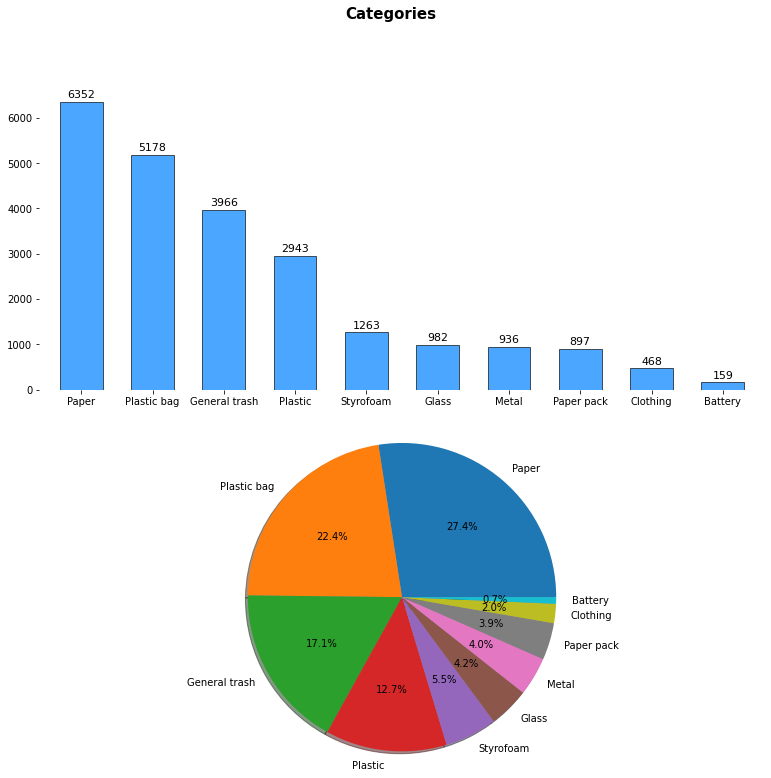

In [86]:
fig, axes= plt.subplots(2, 1, figsize=(13, 12))
##Bar Plot
fig.suptitle('Categories', fontweight='bold', fontsize=15)
axes[0].bar(df_name.index, df_name, width=0.6,color='dodgerblue', linewidth=0.8, edgecolor='black', alpha=0.8)
axes[0].margins(0.03)
axes[0].set(frame_on=False)
for idx, val in df_name.iteritems():
    axes[0].text(x=idx, y=val+50, s=val,
            va='bottom', ha='center',
            fontsize=11)
    
##Pie chart
axes[1].pie(df_name, labels=df_name.index, autopct='%1.1f%%', radius = 1.3, shadow=True)
plt.show()

## Annotation이 가장 많이 되어있는 image

In [254]:
df.drop('drop', axis=1, inplace=True)
df['annotated_file_name'] = 'annotated/'+df['annotated_file_name'] 

In [257]:
df

width  height       file_name  license flickr_url coco_url  \
0       1024    1024  train/0000.jpg        0       None     None   
1       1024    1024  train/0001.jpg        0       None     None   
2       1024    1024  train/0001.jpg        0       None     None   
3       1024    1024  train/0001.jpg        0       None     None   
4       1024    1024  train/0001.jpg        0       None     None   
...      ...     ...             ...      ...        ...      ...   
23139   1024    1024  train/4882.jpg        0       None     None   
23140   1024    1024  train/4882.jpg        0       None     None   
23141   1024    1024  train/4882.jpg        0       None     None   
23142   1024    1024  train/4882.jpg        0       None     None   
23143   1024    1024  train/4882.jpg        0       None     None   

             date_captured  image_id  category_id       area  \
0      2020-12-26 14:44:23         0            0  257301.66   
1      2021-01-10 16:30:39         1            3   10402.56   
2      2021-01-10 16:30:39         1            7   26259.36   
3      2021-01-10 16:30:39         1            4   69096.17   
4      2021-01-10 16:30:39         1            5   24164.58   
...                    ...       ...          ...        ...   
23139  2020-12-23 16:20:30      4882            5  768591.81   
23140  2020-12-23 16:20:30      4882            7   57309.72   
23141  2020-12-23 16:20:30      4882            0    1772.74   
23142  2020-12-23 16:20:30      4882            1   53008.67   
23143  2020-12-23 16:20:30      4882            1  149633.22   

                               bbox  iscrowd     id           name  \
0      [197.6, 193.7, 547.8, 469.7]        0      0  General trash   
1         [0.0, 407.4, 57.6, 180.6]        0      1          Metal   
2        [0.0, 455.6, 144.6, 181.6]        0      2    Plastic bag   
3      [722.3, 313.4, 274.3, 251.9]        0      3          Glass   
4      [353.2, 671.0, 233.7, 103.4]        0      4        Plastic   
...                             ...      ...    ...            ...   
23139    [0.0, 116.2, 944.1, 814.1]        0  23139        Plastic   
23140  [302.1, 439.3, 265.2, 216.1]        0  23140    Plastic bag   
23141    [511.3, 451.1, 58.7, 30.2]        0  23141  General trash   
23142  [255.0, 421.4, 271.7, 195.1]        0  23142          Paper   
23143  [145.4, 295.4, 420.2, 356.1]        0  23143          Paper   

       supercategory annotated_file_name  
0      General trash  annotated/0000.jpg  
1              Metal  annotated/0001.jpg  
2        Plastic bag  annotated/0001.jpg  
3              Glass  annotated/0001.jpg  
4            Plastic  annotated/0001.jpg  
...              ...                 ...  
23139        Plastic  annotated/4882.jpg  
23140    Plastic bag  annotated/4882.jpg  
23141  General trash  annotated/4882.jpg  
23142          Paper  annotated/4882.jpg  
23143          Paper  annotated/4882.jpg  

[23144 rows x 16 columns]

In [289]:
series = df['image_id'].value_counts()
df_temp = series.to_frame()
df_temp.rename(columns={'image_id':'count'}, inplace=True)
df_temp.reset_index(inplace=True)
df_temp=df_temp.rename(columns={'index':'id'})

In [307]:
df_image[['drop', 'annotated_file_name']] = df_image['file_name'].str.split('/', expand=True)
df_image.drop('drop',axis=1, inplace=True)
df_image['annotated_file_name'] = 'annotated/' +df_image['annotated_file_name']
df_to_merge = df_image[['id', 'annotated_file_name']]

In [336]:
df_count = df_temp.merge(df_to_merge, how='left', on='id')
df_count.head(10)

id  count annotated_file_name
0  4197     71  annotated/4197.jpg
1   946     55  annotated/0946.jpg
2  4047     52  annotated/4047.jpg
3   394     48  annotated/0394.jpg
4  2981     46  annotated/2981.jpg
5  2416     46  annotated/2416.jpg
6  1955     46  annotated/1955.jpg
7  1678     44  annotated/1678.jpg
8  4492     42  annotated/4492.jpg
9  1797     42  annotated/1797.jpg

## Annotation개수 상위 10개 출력

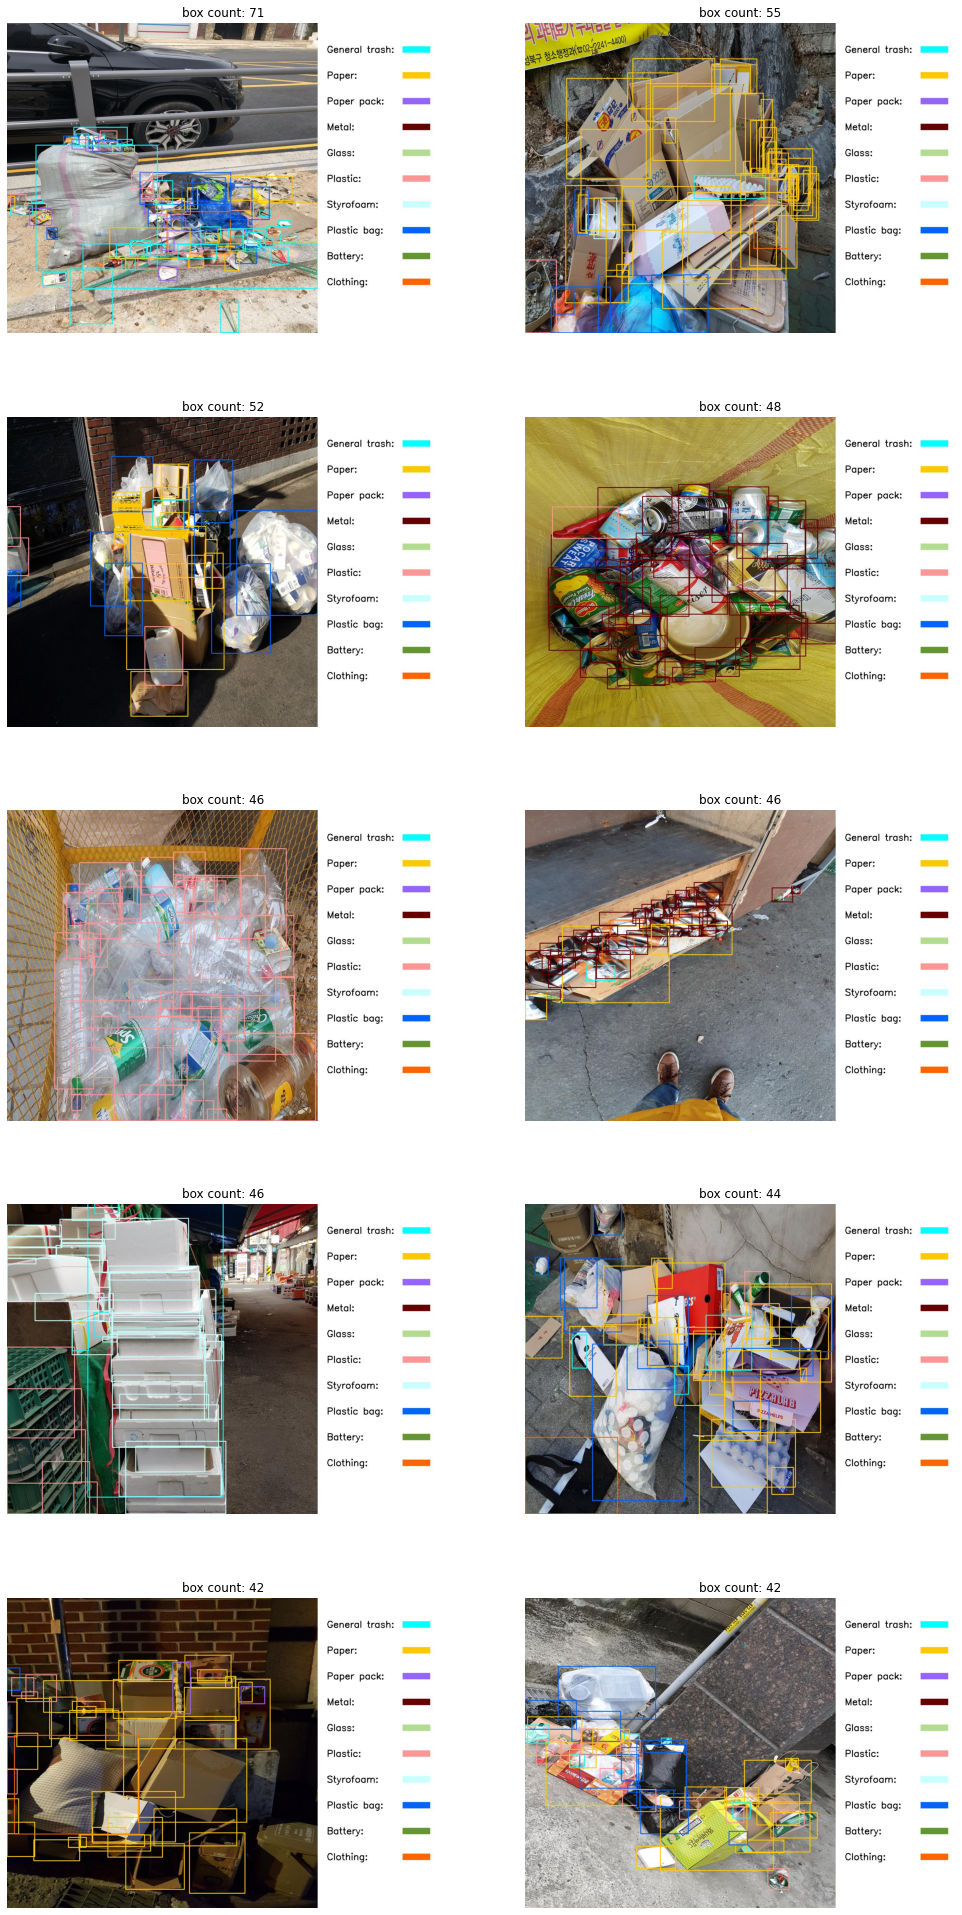

In [345]:
base_dir = '/opt/ml/detection/dataset/'
fig, axes = plt.subplots(5, 2, figsize=(17,35))
idx = 0

for i in range(5):
    for j in range(2):
        title = df_count['count'].iloc[idx]
        axes[i][j].set_title(f'box count: {title}')
        axes[i][j].axis("off")
        img = cv2.imread(base_dir + df_count['annotated_file_name'].iloc[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i][j].imshow(img)
        idx+=1


## Annotation 하위 10개 출력

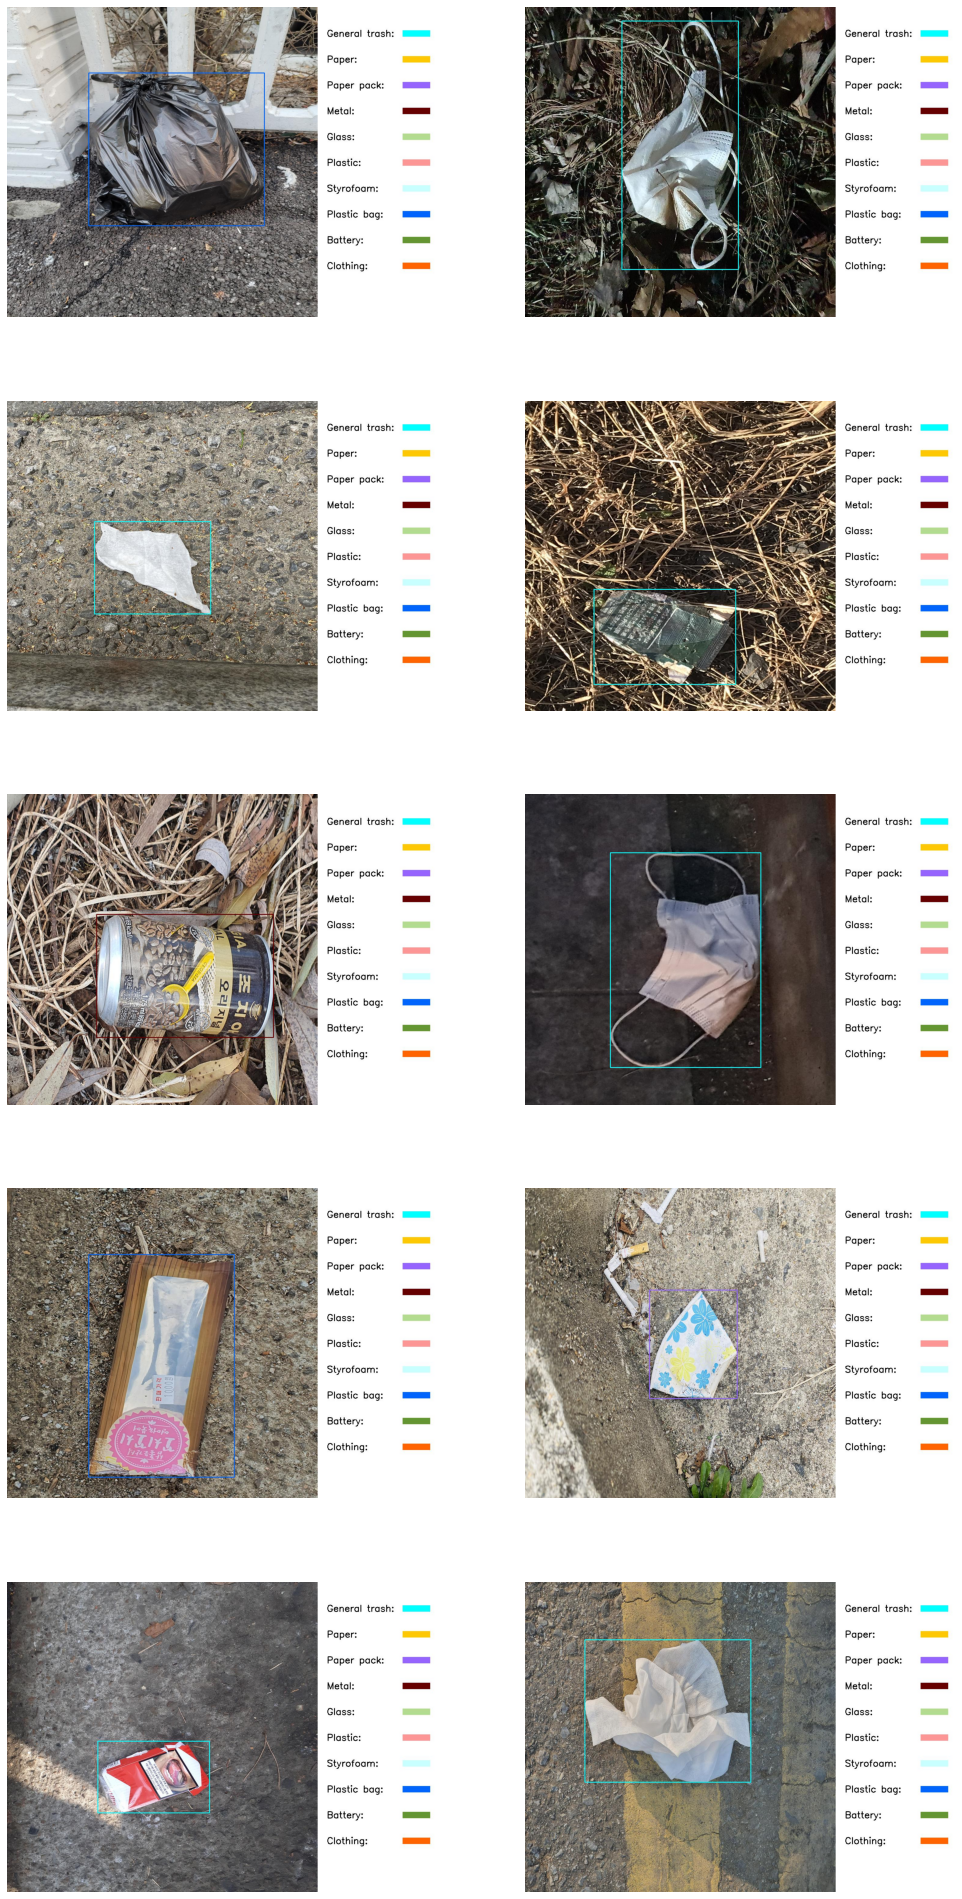

In [350]:
base_dir = '/opt/ml/detection/dataset/'
fig, axes = plt.subplots(5, 2, figsize=(17,35))
idx = len(df_count)-10

for i in range(5):
    for j in range(2):
        
        axes[i][j].axis("off") #x축, y축 지우기
        img = cv2.imread(base_dir + df_count['annotated_file_name'].iloc[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i][j].imshow(img) #이미지 출력
        idx+=1

## 이미지당 annotation 개수를 히토그램을 통해 시각화

In [400]:
df_ccount = df_count['count'].value_counts().to_frame()
df_ccount = df_ccount.reset_index()
df_ccount.columns=['count', 'amount']

a_list = []
for count in df_ccount['count']:
    
    if count <= 2:
        a_list.append('count <= 2')
    elif count > 1 and count <= 10:
        a_list.append('2 < count <= 10')
    elif count > 10 and count < 30:
        a_list.append('10 <= count < 30')
    else:
        a_list.append('count >= 30')

df_ccount['range'] = a_list
df_gcount = df_ccount.groupby(['range']).sum().reset_index()
df_gcount = df_gcount.sort_values(by=['amount'], ascending=False)
df_gcount
    

range  count  amount
2        count <= 2      3    2763
1   2 < count <= 10     52    1502
0  10 <= count < 30    380     561
3       count >= 30    748      57

<AxesSubplot:title={'center':'Range/Amount'}, xlabel='range', ylabel='amount'>

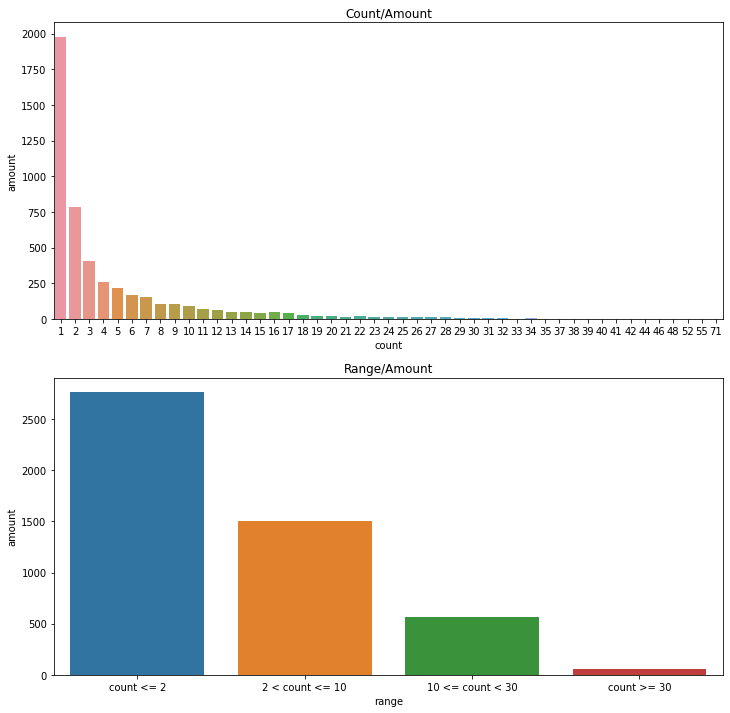

In [401]:
fig, ax = plt.subplots(2, 1, figsize=(12,12))
ax[0].set_title('Count/Amount')
ax[1].set_title('Range/Amount')
sns.barplot(x='count', y='amount',data=df_ccount, ax=ax[0])
sns.barplot(x='range', y='amount',data=df_gcount, ax=ax[1])